In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading dataset
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
df.shape

(8807, 12)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [84]:
#looking for duplicates
df.duplicated().sum()

0

In [18]:
#looking for null values and representing using heatmap
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

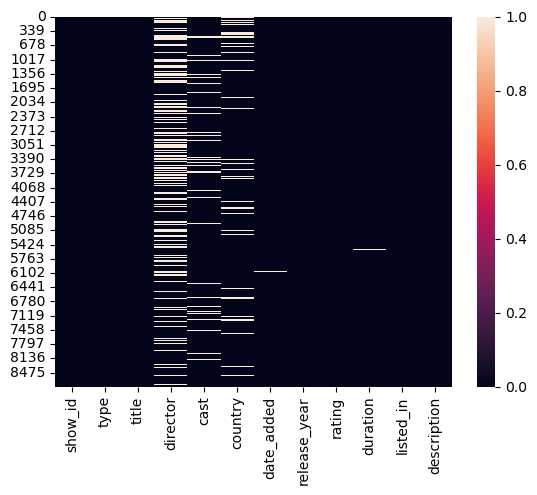

In [21]:
sns.heatmap(df.isnull())

In [204]:
#For 'House of Cards', what is the Show Id and Who is the Director of this show ?
df[df['title'].str.contains('House of Cards')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,minutes,unit
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,2021-04-14,6,Seasons


In [120]:
#In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
df['Date_N']=pd.to_datetime(df['date_added'])              
df['Date_N'].dt.year.value_counts()   

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_N, dtype: int64

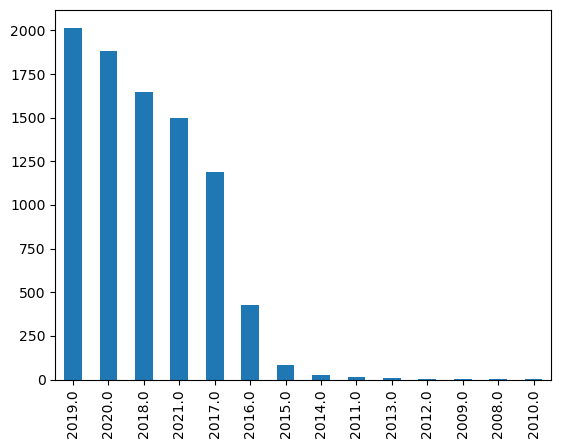

In [95]:
df['Date_N'].dt.year.value_counts().plot(kind='bar');

In [135]:
#Show all the Movies that were released in year 2000.
df[(df['type']=='Movie') &(df['release_year']==2000)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ...",2021-09-01
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,2021-08-01
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer...",2021-08-01
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,2021-07-01
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"July 1, 2021",2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",2021-07-01
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P...",2021-06-02
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,2021-05-01
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...,2019-10-01
4545,s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,"October 2, 2018",2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...,2018-10-02
4723,s4724,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,TV-14,163 min,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...,2018-08-02


In [144]:
#Show only the Titles of all TV Shows that were released in India only.
df[ (df['type']=='TV Show') & (df['country']=='India') ]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

In [145]:
#Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
df['director'].value_counts().head()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: director, dtype: int64

<Axes: >

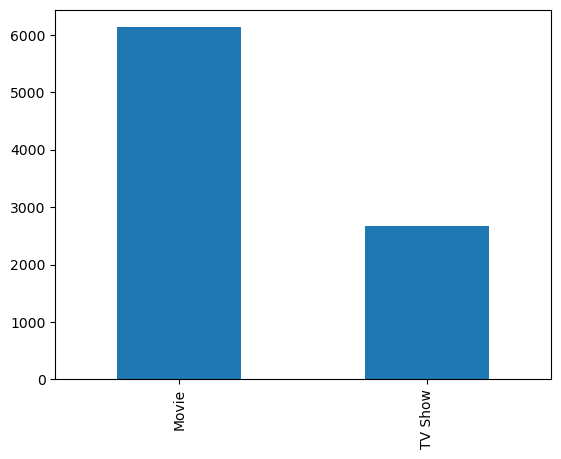

In [151]:
#How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
df['type'].value_counts().plot(kind="bar")

In [202]:
#Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
df[(df['type']=='Movie') & (df['listed_in']=='Comedies') | (df['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,minutes,unit
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,9,Seasons
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,103,min
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021-09-17,3,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15,6,Seasons
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021-09-14,5,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017-03-31,1,Season
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017-03-31,1,Season
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017-11-04,105,min
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,1,Season


In [162]:
#In how many movies/shows, Tom Cruise was cast ?
df2=df.dropna()
df2[df2['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01


In [171]:
#What are the different Ratings defined by Netflix ?
df['rating'].nunique()
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [179]:
#How many Movies got the 'TV-14' rating, in Canada ?
df[(df['type']=='Movie') & (df['rating']=='TV-14') & (df['country']=="Canada")].shape

(13, 13)

In [185]:
#How many TV Shows got the 'R' rating, after year 2018 ?
df[(df['type']=='TV show') & (df["rating"]=="R") & (df["release_year"]>2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N


In [187]:
#What is the maximum duration of a Movie/Show on Netflix ?
df[["minutes",'unit']]=df["duration"].str.split(' ',expand=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2,Seasons


In [197]:
#How can we sort the dataset by Year ?
df.sort_values('release_year', ascending=False).head(4) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,minutes,unit
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",2021-06-17,101,min
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,2021-06-02,99,min
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,2021-06-04,103,min
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,2021-06-04,1,Season


In [199]:
#Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.
df[(df.type=='Movie') & (df.listed_in=='Dramas') | (df.type=='TV Show') & (df.listed_in=="Kids' TV")].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,minutes,unit
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,2021-09-17,1,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16,3,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15,6,Seasons
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",2021-09-09,4,Seasons
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021-09-07,2,Seasons
